# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn

import Data.genData as genData

# Load Data

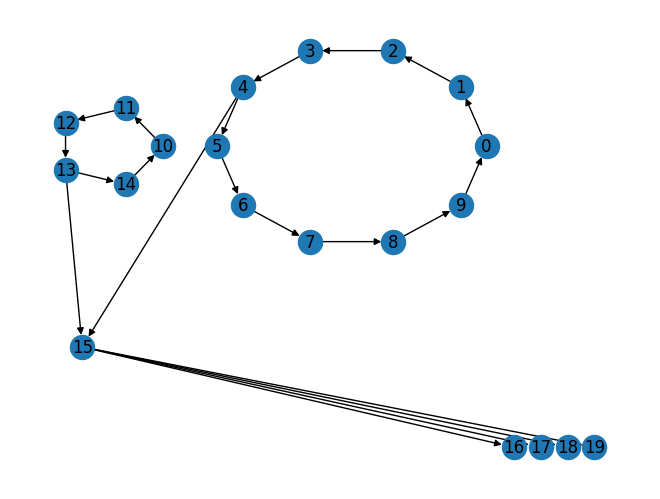

In [2]:
genData.genData()

In [3]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE
--ip: 127.0.0.1
--stdin: 9003
--control: 9001
--hb: 9000
--Session:
  signature_scheme: hmac-sha256
  key: b"2c1c85b3-bf32-4d39-9a7c-bea6ef423360"
--shell: 9002
--transport: tcp
--iopub: 9004
--f: c:\Users\aleja\AppData\Roaming\jupyter\runtime\kernel-v2-155363xwXmJn4bXvM.json



In [4]:
timeseries = np.random.rand(10, 1000)

train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson')

X_train shape:  (10, 600)
X_val shape:  (10, 200)
X_test shape:  (10, 200)


In [5]:
window = 20
model = models.Net(window, 1, 32)

lossfn = loss_func.getLoss()

import torch

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, optimizer)

Using device: cuda
cuda
epoch: 10 	 training loss: 0.09289326667785644 	 validation loss: 0.09102508922417958 	 accuracy : 1.0
epoch: 20 	 training loss: 0.08590277507901192 	 validation loss: 0.08567904432614644 	 accuracy : 1.0
epoch: 30 	 training loss: 0.08448710963129998 	 validation loss: 0.08456175277630489 	 accuracy : 1.0
epoch: 40 	 training loss: 0.08474763855338097 	 validation loss: 0.0841294601559639 	 accuracy : 1.0
epoch: 50 	 training loss: 0.08298620730638503 	 validation loss: 0.08473885804414749 	 accuracy : 1.0
epoch: 60 	 training loss: 0.08345744833350181 	 validation loss: 0.08442754795153935 	 accuracy : 1.0
epoch: 70 	 training loss: 0.0805127713829279 	 validation loss: 0.08426916102568309 	 accuracy : 1.0
epoch: 80 	 training loss: 0.08151587843894958 	 validation loss: 0.08446513364712398 	 accuracy : 1.0
epoch: 90 	 training loss: 0.08262570127844811 	 validation loss: 0.0845072145263354 	 accuracy : 1.0
epoch: 100 	 training loss: 0.0855219304561615 	 val